In [159]:
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img

from sklearn.model_selection import train_test_split
from skimage import io
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

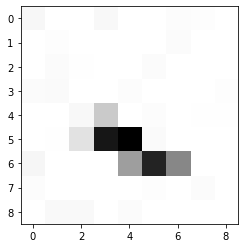

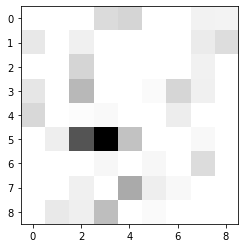

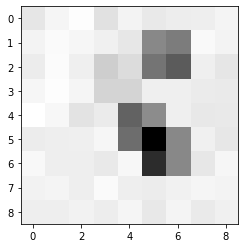

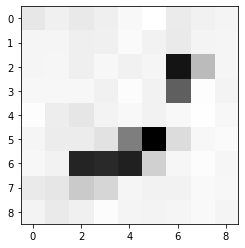

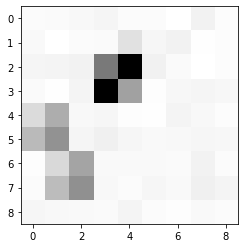

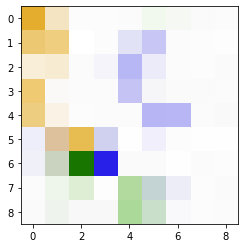

In [13]:
####画像水増し

def add_gauss(input_img,sigma): #ノイズ足す関数
    row,col,ch= input_img.shape
    ch=1 #1=グレースケール,3=カラー
    mean = 0
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = input_img + gauss
    gauss = np.minimum(gauss,255)
    gauss = np.maximum(gauss,0)
    return gauss

def img_resize(input_img, shr):
    return cv2.resize(input_img, dsize=None, fx=shr, fy=shr)

def scale_to_width(input_img, width):
    h, w = input_img.shape[:2]
    height = round(h * (width / w))
    return cv2.resize(input_img, dsize=(width, height))

def main():
    path=os.getcwd()+"\\test_num\\"
    save_path=path #保存先
    save_ext=".bmp" #保存する拡張子
    #print(path)

    n=1 #増やす枚数
    shr=1 #拡大率
    sigma=1 #ノイズ,大=多 

    img_names = glob.glob(path+"*"+save_ext)
    #img_names=[path+"9.bmp"]

    for filename in img_names:
        savefname = os.path.splitext(os.path.basename(filename))[0]
        img = cv2.imread(filename,1) #1=カラー 0=グレー -1=透明
        img = np.array(img)
        x = img.reshape((1,) + img.shape)
        for i in range(n):
            data_generator = ImageDataGenerator(
                rotation_range=50, #回転 +-n
                vertical_flip=False, #True, #上下反転 TF
                horizontal_flip=False, #True, #左右反転 TF
                height_shift_range=0.1, #上下平行移動 +- rate
                width_shift_range=0.1, #左右平行移動 +- rate
                brightness_range=[0.95, 1.05] #明度 rate
            ) 
            generator = data_generator.flow(x, batch_size=1)
            batches = next(generator)  
            img = batches[0]
            img = add_gauss(img,sigma) #ガウスノイズ付加
            img = img_resize(img,shr) #縮小
            #print(img)
            get_img = array_to_img(img)

            #cv2.imwrite(save_path+savefname+"_"+str(i)+save_ext, img) #保存
            plt.imshow(get_img)
            plt.show()

        #print(get_img)
    
if __name__ == "__main__":
    main()  

In [39]:
##ファイル読み込み, データ準備
import csv
def create_images_array(load_img_paths):
    imgs = []
    # 画像群の配列を生成
    for filename in load_img_paths:
        img = cv2.imread(filename)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #グレースケール
        #img = cv2.bitwise_not(img) #色反転
        img = img.flatten() #1次元化
        imgs.append(img)
    return np.array(imgs, np.float32)

def read_files(path,label): #画像直接
    img_names = glob.glob(path+"*.bmp")
    imgs=create_images_array(img_names)
    labels = np.full(len(img_names), label, np.int32)
    data=np.c_[imgs,labels]
    return [data[:,0:-1],data[:,-1],data]

def make_train_test(test_sz,train_sz):
    path=os.getcwd()+"\\test_num\\"
    data=read_files(path,1)
    x=data[0]
    y=data[1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_sz, train_size=train_sz)
    return [x_train, x_test, y_train, y_test]

def write_file(path,name):
    data=read_files(path,1)[2]
    df = pd.DataFrame(data)
    if name!="":
        df.to_csv(path+name+".csv",mode="a",haeder=False,index = False)
    
    # df　読み込みdf = pd.read_csv('data/src/sample_pandas_normal.csv', index_col=0)


def pca_data(): #PCA 
    path=os.getcwd()+"\\test_num\\"
    

if __name__ == "__main__":
    #print(make_train_test(0.5,0.5))
    path=os.getcwd()+"\\test_num\\"
    write_file(path,"tst")

In [ ]:
###　openCV

def opencv_svm():
    pass

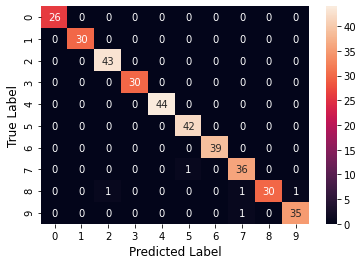

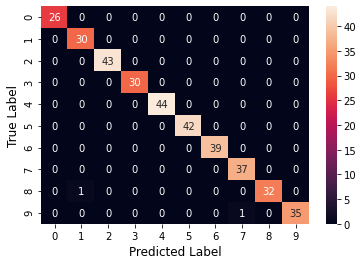

C:\Users\Owner\anaconda3\envs\py38\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Owner\anaconda3\envs\py38\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


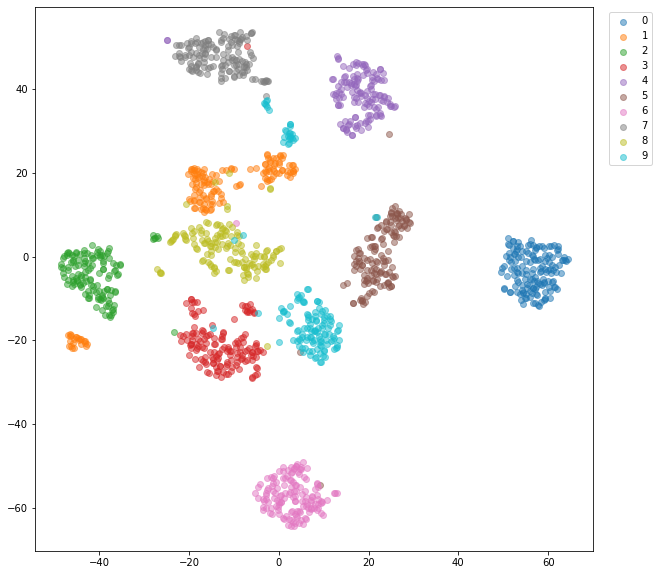

In [173]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as met

# def pca_data(df,lab): #PCA
#     #print(df)
#     dfs = df#df.iloc[1:,1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
#     pca=PCA()
#     pca.fit(dfs)
#     feature = pca.transform(dfs)
#     #print(pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head())
#     plt.figure(figsize=(6, 6))
#     lab=list(lab.iloc[:].values)
#     #print(lab)
#     plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8,c=lab, cmap="tab10")
#     plt.legend()#labels=range(1,9),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
#     plt.grid()
#     plt.xlabel("PC1")
#     plt.ylabel("PC2")
#     plt.show()

    
def tsne_plot(df,labl):
    lab_num=set(labl.iloc[:].values)
    #print(lab_num)
    df2d = TSNE(n_components=2).fit_transform(df)
    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    for i in range(len(lab_num)):
        target = df2d[labl == i]
        ax.scatter(x=target[:, 0], y=target[:, 1], label=str(i), alpha=0.5)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    
a_ac,a_prec,a_rec=0,0,0
b_ac,b_prec,b_rec=0,0,0
n=1

for i in range(n):
    digits = load_digits(as_frame=True)
    x = digits.frame.iloc[:, 0:-1]
    y = digits.frame.iloc[:, -1]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8)
 
    model_lin = SVC(kernel="linear", max_iter=1000000)
    model_lin.fit(x_train, y_train)   
    pred = model_lin.predict(x_test)
    a_ac+=met.accuracy_score(y_test, pred)
    a_prec+=met.precision_score(y_test, pred, average=None)
    a_rec+=met.recall_score(y_test, pred, average=None)
    a_pred=pred
    
    model_rbf = SVC(kernel="rbf", max_iter=1000000)
    model_rbf.fit(x_train, y_train)
    pred = model_rbf.predict(x_test)
    b_ac+=met.accuracy_score(y_test, pred)
    b_prec+=met.precision_score(y_test, pred,average=None)
    b_rec+=met.recall_score(y_test, pred, average=None)
    b_pred=pred
    
#混合行列
confusion_matrix = met.confusion_matrix(y_test, a_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.show()

confusion_matrix = met.confusion_matrix(y_test, b_pred)
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.show()

#     x_decision = x_train.iloc[:, :-1].values
#     print(x_decision)
#     y_decision = y_train.values
#     plot_decision_regions(x_decision, y_decision, clf=model_lin)

tsne_plot(x_train,y_train)


    
#print("accuracy",round(a_ac/n,3),round(b_ac/n,3))
#print("precision",np.round(a_prec/n,3),np.round(b_prec/n,3))
#print("recall",np.round(a_rec/n,3),np.round(b_rec/n,3))

In [136]:
###　sklearn
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

def sk_svm_linear():
    x_train, x_test, y_train, y_test=make_train_test(0.5,0.5)
    #print(x_train, x_test, y_train, y_test)
    model = LinearSVC(max_iter=1000000)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
if __name__ == "__main__":
    sk_svm_linear()


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [ ]:
## gene